Let $X$ be a Poisson process on the 1-dimensional line with parameter rate 2. Let $Y$ be a Poisson process on the 2-dimensional plane with parameter rate 2.

So if $I$ is a subset of the interval and $A$ a subset of the plane than we let $X(I)$ be the number of events in $I$ and $Y(A)$ be the number of events in $A$.

Consider the case where $I = [\frac{-\alpha}{2},\frac{\alpha}{2}]$ and $A = [\frac{-\beta}{2},\frac{\beta}{2}]^2$.

1. Find numerically the smallest positive integer $\alpha$ and $\beta$ so that the $P(X(I) = 0) \leq 0.0005$ and $P(Y(A) = 0) \leq 0.0005$.

2. What is the distributions of the two random variables $X(I)$ and $Y(A)$ with the values of $\alpha$ and $\beta$ found in the previous section?

3. Use the algorithm described in this section to generate a realizations of a poisson random process in $I$ and $A$. Recall one first draws the number of events in $I$ and $A$ using $X(I)$ and $Y(A)$ and then places that number of points uniformly at random in $I$ and $A$. Plot 4 realizations of each process.

1.3

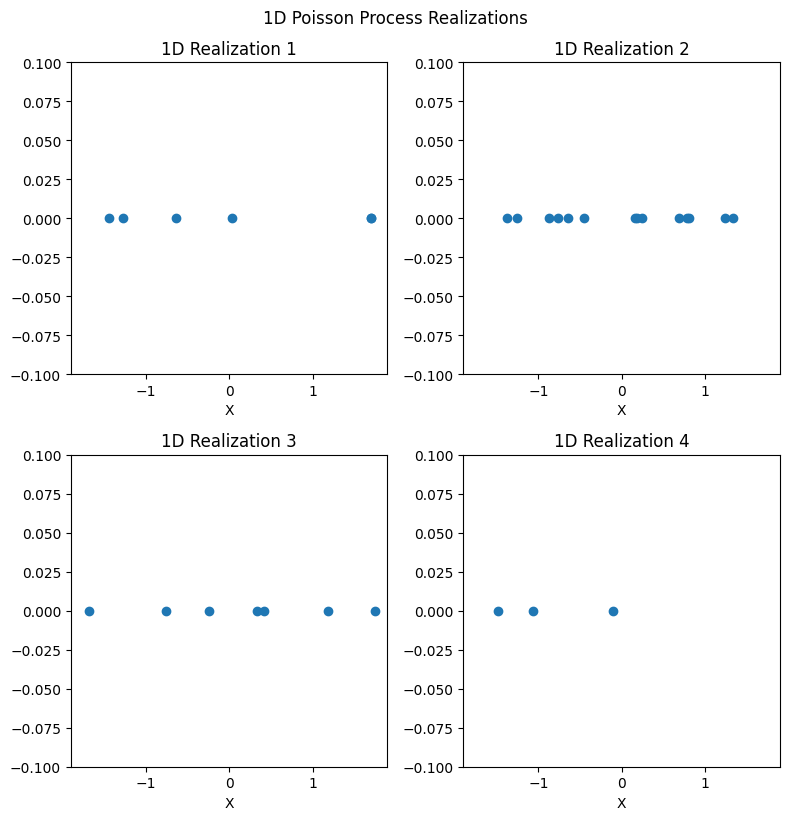

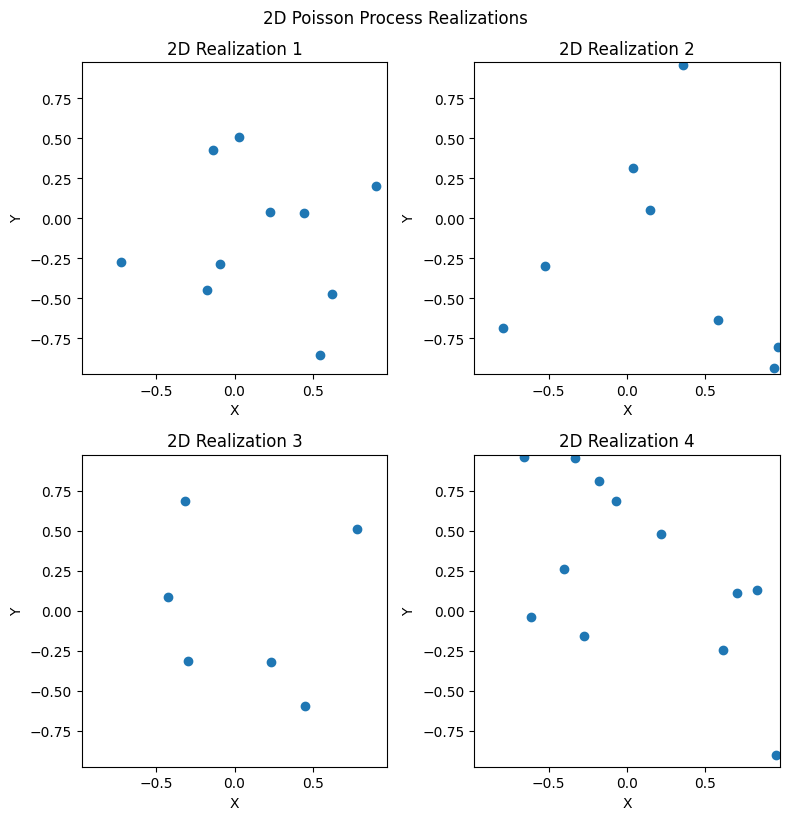

In [1]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 3.8
beta = 1.95
lambda_I = 7.6
lambda_A = 7.6
num_realizations = 4

# Generate 1D realizations in I
def generate_1D_realizations(lambda_val, interval, num_realizations):
    realizations = []
    for i in range(num_realizations):
        num_events = np.random.poisson(lambda_val)
        realization = np.random.uniform(-interval / 2, interval / 2, num_events)
        realizations.append(realization)
    return realizations

# Generate 2D realizations in A
def generate_2D_realizations(lambda_val, square_side, num_realizations):
    realizations = []
    for i in range(num_realizations):
        num_events = np.random.poisson(lambda_val)
        realization = np.random.uniform(-square_side / 2, square_side / 2, (num_events, 2))
        realizations.append(realization)
    return realizations

realizations_I = generate_1D_realizations(lambda_I, alpha, num_realizations)
realizations_A = generate_2D_realizations(lambda_A, beta, num_realizations)

# Plot 1D realizations
plt.figure(figsize=(8, 8))
for i, realization in enumerate(realizations_I):
    plt.subplot(2, 2, i + 1)
    plt.title(f"1D Realization {i + 1}")
    if len(realization) > 0:
        plt.scatter(realization, [0] * len(realization))
    plt.xlim(-alpha / 2, alpha / 2)
    plt.ylim(-0.1, 0.1)
    plt.xlabel("X")
    plt.ylabel("")
plt.tight_layout()
plt.suptitle("1D Poisson Process Realizations", y=1.02)

# Plot 2D realizations
plt.figure(figsize=(8, 8))
for i, realization in enumerate(realizations_A):
    plt.subplot(2, 2, i + 1)
    plt.title(f"2D Realization {i + 1}")
    if len(realization) > 0:
        plt.scatter(realization[:, 0], realization[:, 1])
    plt.xlim(-beta / 2, beta / 2)
    plt.ylim(-beta / 2, beta / 2)
    plt.xlabel("X")
    plt.ylabel("Y")
plt.tight_layout()
plt.suptitle("2D Poisson Process Realizations", y=1.02)

plt.show()


1.5 1.6

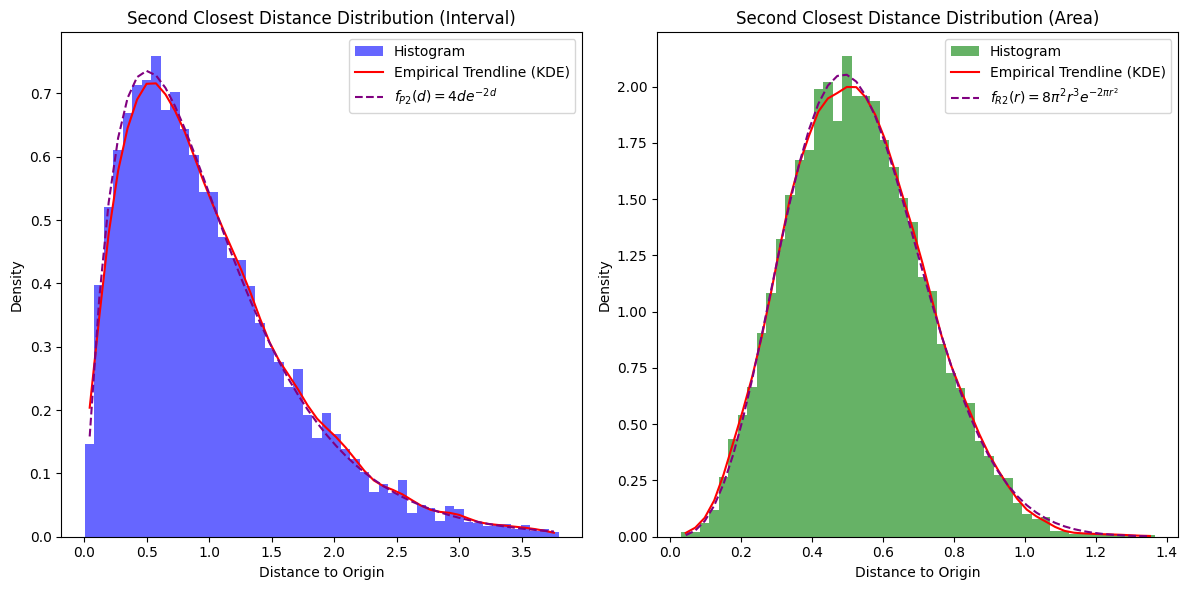

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Parameters for empirical estimation
sample_size = 10000  # Number of samples for empirical distribution
lambda_param = 2
interval_alpha = 3.80045
box_size = 1.94947

# Poisson means
mean_I = lambda_param * interval_alpha
mean_A = lambda_param * box_size**2

distances_interval = []  # Distances for interval I
distances_area = []  # Distances for interval A

# Generate samples
for _ in range(sample_size):
    # Generate points in interval (1D) and area (2D)
    points_count_I = np.random.poisson(mean_I)
    points_count_A = np.random.poisson(mean_A)
    
    points_I = np.random.uniform(0, interval_alpha, points_count_I)
    x_coords_A = np.random.uniform(-box_size / 2, box_size / 2, points_count_A)
    y_coords_A = np.random.uniform(-box_size / 2, box_size / 2, points_count_A)
    
    # Compute distances to the origin
    sorted_distances_I = np.sort(np.abs(points_I))  # 1D distances
    sorted_distances_A = np.sort(np.sqrt(x_coords_A**2 + y_coords_A**2))  # 2D distances
    
    # Record the second closest distance if applicable
    if len(sorted_distances_I) > 1:
        distances_interval.append(sorted_distances_I[1])
    if len(sorted_distances_A) > 1:
        distances_area.append(sorted_distances_A[1])

# Create histograms and trendlines
plt.figure(figsize=(12, 6))

# Histogram and trendline for distances in interval I
plt.subplot(1, 2, 1)
hist_I, bins_I, _ = plt.hist(distances_interval, bins=50, color='blue', alpha=0.6, density=True, label='Histogram')
bin_centers_I = (bins_I[:-1] + bins_I[1:]) / 2
kde_density_I = gaussian_kde(distances_interval)
plt.plot(bin_centers_I, kde_density_I(bin_centers_I), color='red', label='Empirical Trendline (KDE)')

# Theoretical trendline fP2(d) = 4d * e^(-2d)
theory_I = 4 * bin_centers_I * np.exp(-2 * bin_centers_I)
plt.plot(bin_centers_I, theory_I, color='purple', linestyle='--', label=r'$f_{P2}(d) = 4d e^{-2d}$')

plt.title('Second Closest Distance Distribution (Interval)')
plt.xlabel('Distance to Origin')
plt.ylabel('Density')
plt.legend()

# Histogram and trendline for distances in area A
plt.subplot(1, 2, 2)
hist_A, bins_A, _ = plt.hist(distances_area, bins=50, color='green', alpha=0.6, density=True, label='Histogram')
bin_centers_A = (bins_A[:-1] + bins_A[1:]) / 2
kde_density_A = gaussian_kde(distances_area)
plt.plot(bin_centers_A, kde_density_A(bin_centers_A), color='red', label='Empirical Trendline (KDE)')

# Theoretical trendline fR2(r) = 16π²(r³) * e^(-2πr²)
theory_A = 8 * np.pi**2 * bin_centers_A**3 * np.exp(-2 * np.pi * bin_centers_A**2)
plt.plot(bin_centers_A, theory_A, color='purple', linestyle='--', label=r'$f_{R2}(r) = 8\pi^2 r^3 e^{-2\pi r^2}$')

plt.title('Second Closest Distance Distribution (Area)')
plt.xlabel('Distance to Origin')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

#2 MCMC for parameter fitting
X=np.loadtxt("poisson.txt")

alpha = 10
beta = 1
n = 500
betaprime = beta + n
alphaprime = sum(X) + alpha
print("alphaprime = ", alphaprime)
print("betaprime = ", betaprime)



alphaprime =  3948.0
betaprime =  501


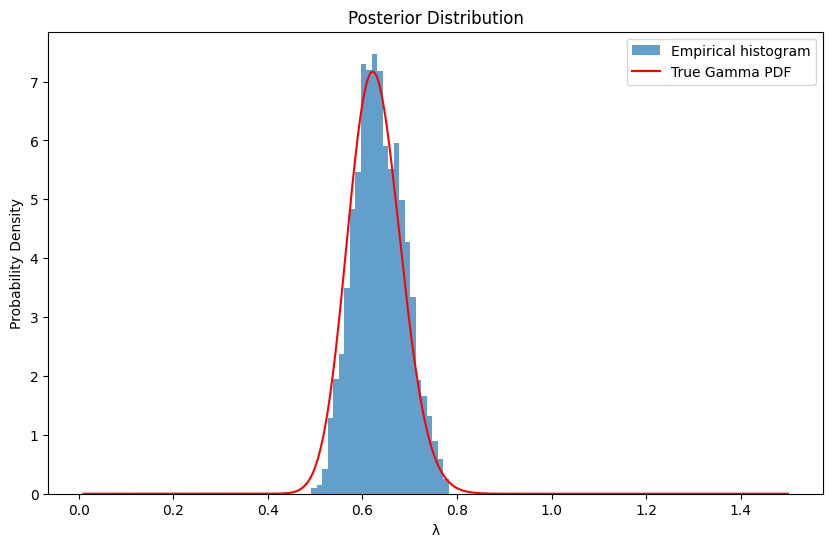

In [4]:
import random as rnd

# Parameters
number_data = 200
lambdaa = 0.5  # initial guess
alpha = 10  # prior alpha
beta = 1  # prior beta
number_samples = 40000
burn_in = 1000  # samples to discard during burn-in
step_size = 0.01  # random walk step size

# Generate Poisson samples
def poisson_samples(lambdaa, number_data):
    return [np.random.poisson(lambdaa) for _ in range(number_data)]

X = poisson_samples(lambdaa, number_data)

# Gamma PDF
def gamma_pdf(x, alpha, beta):
    if x <= 0:
        return 0  # PDF is 0 for x <= 0
    return (beta**alpha / math.gamma(alpha)) * x**(alpha - 1) * math.exp(-beta * x)

# Random walk proposal function
def randomWalk(x, step=0.01):
    y = x + (rnd.random() - 0.5) * step  # random walk step
    return max(y, 1e-6)  # Ensure the proposal is positive

# Log posterior
def log_posterior(X, lambdaa, alpha, beta):
    if lambdaa <= 0:
        return -np.inf  # Log of invalid lambdaa
    s = sum(X)
    n = len(X)
    log_likelihood = s * math.log(lambdaa) - n * lambdaa
    log_prior = (alpha - 1) * math.log(lambdaa) - beta * lambdaa
    return log_likelihood + log_prior  # Log posterior = log likelihood + log prior

# MCMC sampling
samples = []
current_lambda = lambdaa
for k in range(number_samples + burn_in):
    # Propose a new value
    proposal_lambda = randomWalk(current_lambda, step_size)
    
    # Calculate acceptance ratio
    log_acceptance_ratio = log_posterior(X, proposal_lambda, alpha, beta) - log_posterior(X, current_lambda, alpha, beta)
    acceptance_prob = min(1, math.exp(log_acceptance_ratio))
    
    # Accept or reject the proposal
    if rnd.random() < acceptance_prob:
        current_lambda = proposal_lambda
    
    # Record samples after burn-in
    if k >= burn_in:
        samples.append(current_lambda)

# Posterior Gamma distribution parameters
s = sum(X)
n = len(X)
alpha_prime = alpha + s
beta_prime = beta + n

# Plot the results
fig = plt.figure(figsize=(10, 6))
plt.hist(samples, bins=25, density=True, alpha=0.7, label="Empirical histogram")

xvals = np.linspace(0.01, 1.5, 5000)
true_pdf = [gamma_pdf(x, alpha_prime, beta_prime) for x in xvals]
plt.plot(xvals, true_pdf, label="True Gamma PDF", color="red")

plt.xlabel("λ")
plt.ylabel("Probability Density")
plt.title("Posterior Distribution")
plt.legend()
plt.show()


1. Each letter can be mapped to any other letter in the alphabet so --> 26!

2. It is not feasible to calculate $\pi(B)$ directly for a codebook $B$ applied to an encrypted text $C$ because there is a huge search space of 25! mappings. Additionally, you need the conditional probabilities $p(\beta|\alpha)$ which takes a lot of data, and also you need the product of those conditional probabilities, which makes the numbers insanely small. You also can't calculate the normalization constant Z. Therefore, we use MCMC methods to sample from $\pi(B)$ without having to find it explicitly.

3. The swap chain is symmetric because the proposal selects two numbers uniformly at random and swaps the two of them. Out of $C(26,2) = 325$ pairs of swaps, the probability of swapping $B$ to $B' = \frac{1}{325}$. Likewise, swapping $B'$ to $B = \frac{1}{325}$. Therefore, $T(B,B') = T(B',B)$ which shows symmetry. The probability of any specific swap given codebook $B$ is $\frac{1}{325}$ as there are $325$ different pairs of letters you can swap.

4. If we use the Metropolis-Hastings algorithm, the acceptance probabiliy is 
$A(B,B') = min(1, \frac{\pi(B')}{\pi(B)})$.
We know that $\frac{\pi(B')}{\pi(B)} = e^{l(A_B')-l(A_B)}$ and the proposal chain is symmetric.
The acceptance probability simplifies to $A(B,B') = min(1, e^{l(A_B')-l(A_B)})$. We accept the proposed swap if it increases the log-likelihood $l(A_B)$ or with a probability proportional to the improvement if it decreases the log-likelihood.
5. 

{('E', 'M'): 0.024288332315210753, ('M', 'M'): 0.03364710990073609, ('M', 'A'): 0.16115090876798294, ('A', ' '): 0.07388112866702287, (' ', 'W'): 0.07957635201503267, ('W', 'O'): 0.12647572117852376, ('O', 'O'): 0.035135225264281186, ('O', 'D'): 0.018728115516723914, ('D', 'H'): 0.007570469152444455, ('H', 'O'): 0.07498459389507416, ('O', 'U'): 0.14277520258778803, ('U', 'S'): 0.12483704437607551, ('S', 'E'): 0.11140620979856748, ('E', ' '): 0.33554876807167583, (' ', 'H'): 0.07518233281611077, ('H', 'A'): 0.17792202456760198, ('A', 'N'): 0.2077449558557871, ('N', 'D'): 0.178982920574389, ('D', 'S'): 0.026731338613003395, ('S', 'O'): 0.05972428560757592, ('O', 'M'): 0.0536899323039984, ('M', 'E'): 0.23941744124089753, (' ', 'C'): 0.03755557769964079, ('C', 'L'): 0.03957169459962756, ('L', 'E'): 0.16993245416532649, ('E', 'V'): 0.018916717572795765, ('V', 'E'): 0.758125, ('E', 'R'): 0.14030136428425982, ('R', ' '): 0.22890403682719546, (' ', 'A'): 0.11769423130762405, ('D', ' '): 0.5916

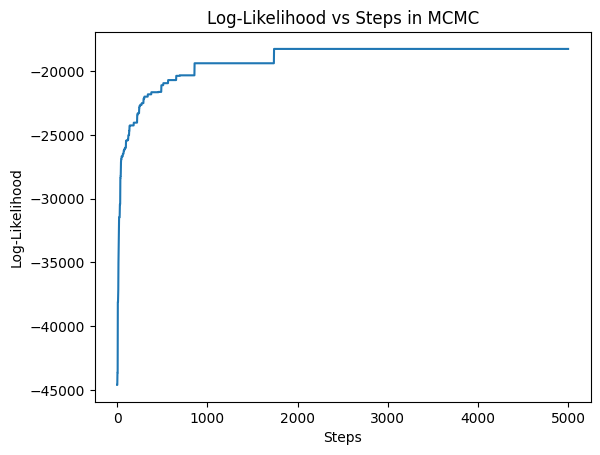

Best Decoded Text:
WHEN IN THE COURSE OF HUMAN EVENTS IT BECOMES NECESSARY FOR ONE PEOPLE TO DISSOLVE THE POLITICAL BANDS WHICH HAVE CONNECTED THEM WITH ANOTHER AND TO ASSUME AMONG THE POWERS OF THE EARTH THE SEPARATE AND EQUAL STATION TO WHICH THE LAWS OF NATURE AND OF NATURES GOD ENTITLE THEM A DECENT RESPECT TO THE OPINIONS OF MANKIND REQUIRES THAT THEY SHOULD DECLARE THE CAUSES WHICH IMPEL THEM TO THE SEPARATION WE HOLD THESE TRUTHS TO BE SELFEVIDENT THAT ALL MEN ARE CREATED EQUAL THAT THEY ARE ENDOWED BY THEIR CREATOR WITH CERTAIN UNALIENABLE RIGHTS THAT AMONG THESE ARE LIFE LIBERTY AND THE PURSUIT OF HAPPINESS THAT TO SECURE THESE RIGHTS GOVERNMENTS ARE INSTITUTED AMONG MEN DERIVING THEIR JUST POWERS FROM THE CONSENT OF THE GOVERNED THAT WHENEVER ANY FORM OF GOVERNMENT BECOMES DESTRUCTIVE OF THESE ENDS IT IS THE RIGHT OF THE PEOPLE TO ALTER OR TO ABOLISH IT AND TO INSTITUTE NEW GOVERNMENT LAYING ITS FOUNDATION ON SUCH PRINCIPLES AND ORGANIZING ITS POWERS IN SUCH FORM AS TO THEM S

In [5]:
import math
import random as rnd

# Define helper functions for cleaning and parsing text
def cleanText(data):
    data = data.upper()
    makeSpacesChar = [',', '!', '?', ';', '.', ':']  # Characters to replace with spaces
    for i in range(10):
        makeSpacesChar.append(str(i))  # Add numbers to the list
    for c in makeSpacesChar:
        data = data.replace(c, ' ')  # Replace each character with a space
    data = ' '.join(data.split())  # Remove extra spaces
    onlyGoodChar = [c for c in data if ((c <= 'Z') and (c >= 'A')) or (c == ' ')]
    return ''.join(onlyGoodChar)

def addCounts(pairDictionary, data):
    for i in range(len(data) - 1):
        c1 = data[i]
        c2 = data[i + 1]
        if (('A' <= c1 <= 'Z') or c1 == ' ') and (('A' <= c2 <= 'Z') or c2 == ' '):
            key = (c1, c2)
            if key in pairDictionary:
                pairDictionary[key] += 1
            else:
                pairDictionary[key] = 1

# Load text files and compute letter-pair probabilities
fileNames = ["emma.txt","ajourney.txt","jungle.txt","theproblem.txt"]

pairDictionary = {}
directory = "Data/"

for fileName in fileNames:
    with open(directory + fileName, 'r') as file:
        data = file.read().replace('\n', '')
    data = cleanText(data)
    addCounts(pairDictionary, data)

# Convert pairDictionary to conditional probabilities
total_counts = {}
for (c1, c2), count in pairDictionary.items():
    if c1 not in total_counts:
        total_counts[c1] = 0
    total_counts[c1] += count

conditional_probs = {pair: count / total_counts[pair[0]] for pair, count in pairDictionary.items()}
print(conditional_probs)
epsilon = math.exp(-16)  # Small probability to avoid log(0)

def logLikelihood(text, cond_probs, epsilon=math.exp(-16)):
    log_likelihood = 0
    for i in range(len(text) - 1):
        c1, c2 = text[i], text[i + 1]
        if (c1, c2) in cond_probs:
            log_likelihood += math.log(max(cond_probs[(c1, c2)], epsilon))
        else:
            log_likelihood += math.log(epsilon)
    return log_likelihood

def randomCodebook():
    alpha = [chr(c) for c in range(ord('A'), ord('A') + 26)]
    alpha2 = alpha.copy()
    rnd.shuffle(alpha2)
    return {a: b for a, b in zip(alpha, alpha2)}

def invertCodeBook(codeBook):
    return {v: k for k, v in codeBook.items()}

def applyCodeBook(text, codeBook):
    return ''.join([codeBook[c] if c in codeBook else c for c in text])

def randSwapInCodeBook(codeBook):
    keys = rnd.sample(list(codeBook.keys()), 2)
    codeBook[keys[0]], codeBook[keys[1]] = codeBook[keys[1]], codeBook[keys[0]]

def metropolisHastingsStep(current_codebook, encrypted_text, cond_probs):
    proposed_codebook = current_codebook.copy()
    randSwapInCodeBook(proposed_codebook)
    
    current_decrypted = applyCodeBook(encrypted_text, current_codebook)
    proposed_decrypted = applyCodeBook(encrypted_text, proposed_codebook)
    
    current_likelihood = logLikelihood(current_decrypted, cond_probs)
    proposed_likelihood = logLikelihood(proposed_decrypted, cond_probs)

    likelihood_diff = proposed_likelihood - current_likelihood
    likelihood_diff = max(min(likelihood_diff, 700), -700)
    
    acceptance_ratio = math.exp(likelihood_diff)
    if rnd.random() < acceptance_ratio:
        return proposed_codebook, proposed_likelihood
    return current_codebook, current_likelihood

import matplotlib.pyplot as plt

# Load encrypted text
with open("Data/encoded.txt", "r") as file:
    encrypted_text = cleanText(file.read())

# Initialize variables
num_steps = 5000
current_codebook = randomCodebook()
best_codebook = current_codebook.copy()
best_likelihood = float('-inf')
log_likelihoods = []

# Run Metropolis-Hastings
for step in range(num_steps):
    current_codebook, current_likelihood = metropolisHastingsStep(
        current_codebook, encrypted_text, conditional_probs
    )
    log_likelihoods.append(current_likelihood)
    
    # Update the best codebook and likelihood
    if current_likelihood > best_likelihood:
        best_codebook = current_codebook.copy()
        best_likelihood = current_likelihood

# Decode using the best codebook
best_decryption = applyCodeBook(encrypted_text, best_codebook)

# Plot the log-likelihood
plt.plot(log_likelihoods)
plt.xlabel("Steps")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood vs Steps in MCMC")
plt.show()

# Print the best decoding
print("Best Decoded Text:")
print(best_decryption)

5g. Decrypt was split in half seven times before it broke. We were using 5000 MCMC Steps.

{('E', 'M'): 0.023339625879526343, ('M', 'M'): 0.03761178327196212, ('M', 'A'): 0.17438190426091532, ('A', ' '): 0.08654526166902404, (' ', 'W'): 0.0770814652452592, ('W', 'O'): 0.12041728763040238, ('O', 'O'): 0.04009433962264151, ('O', 'D'): 0.023773584905660377, ('D', 'H'): 0.010576414595452142, ('H', 'O'): 0.0737379466817924, ('O', 'U'): 0.13943396226415095, ('U', 'S'): 0.12372670807453416, ('S', 'E'): 0.11055900621118013, ('E', ' '): 0.33178879926777644, (' ', 'H'): 0.07661651888014347, ('H', 'A'): 0.17515598411798072, ('A', 'N'): 0.20924681753889673, ('N', 'D'): 0.18444490472245237, ('D', 'S'): 0.03155297020976556, ('S', 'O'): 0.06629023150762281, ('O', 'M'): 0.06009433962264151, ('M', 'E'): 0.22882693319305628, (' ', 'C'): 0.033642190561588785, ('C', 'L'): 0.04966598896311356, ('L', 'E'): 0.18926010145181038, ('E', 'V'): 0.02156627195240547, ('V', 'E'): 0.759656652360515, ('E', 'R'): 0.1478748355357245, ('R', ' '): 0.24469260031905754, (' ', 'A'): 0.12105210720334761, ('D', ' ')

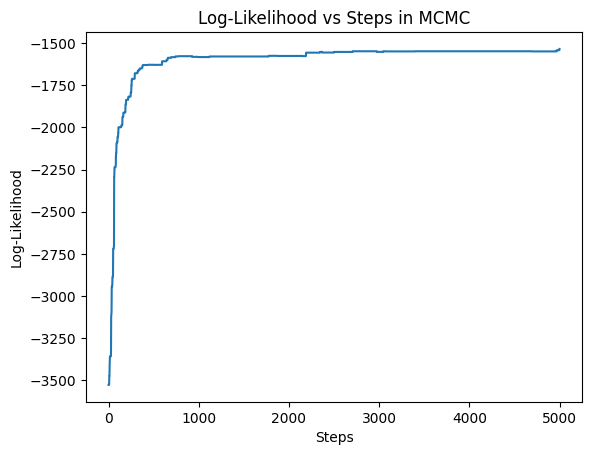

Best Decoded Text:
WDEN IN LDE CAUTSE AY DUMON EVENLS IL FECAMES NECESSOTH YAT ANE PEAPRE LA GISSARVE LDE PARILICOR FONGS WDICD DOVE CANNECLEG LDEM WILD ONALDET ONG LA OSSUME OMANK LDE PAWETS AY LDE EOTLD LDE SEPOTOLE ONG EQUOR SLOLIAN LA WDICD LDE ROWS AY NOLUTE ONG AY NOLUTES KAG ENLILRE LDEM O GECENL TESPECL LA LDE APINIANS AY MONZING TEQUITES LDOL LDEH SDAURG GECROTE LDE COUSES WDICD IMPER LDEM LA LDE SEPOTOLIAN WE DARG LDESE LTULDS LA FE SERYEVIGENL LDOL ORR MEN OTE CTEOLEG EQUOR LDOL LDEH OTE ENGAWEG FH LDEIT CTEOLAT WILD CETLOIN UNORIENOFRE TIKDLS LDOL OMANK LDESE OT


In [1]:
import math
import random as rnd

# Define helper functions for cleaning and parsing text
def cleanText(data):
    data = data.upper()
    makeSpacesChar = [',', '!', '?', ';', '.', ':']  # Characters to replace with spaces
    for i in range(10):
        makeSpacesChar.append(str(i))  # Add numbers to the list
    for c in makeSpacesChar:
        data = data.replace(c, ' ')  # Replace each character with a space
    data = ' '.join(data.split())  # Remove extra spaces
    onlyGoodChar = [c for c in data if ((c <= 'Z') and (c >= 'A')) or (c == ' ')]
    onlyGoodChar = onlyGoodChar[:(len(onlyGoodChar)//(2*7))]
    return ''.join(onlyGoodChar)

def addCounts(pairDictionary, data):
    for i in range(len(data) - 1):
        c1 = data[i]
        c2 = data[i + 1]
        if (('A' <= c1 <= 'Z') or c1 == ' ') and (('A' <= c2 <= 'Z') or c2 == ' '):
            key = (c1, c2)
            if key in pairDictionary:
                pairDictionary[key] += 1
            else:
                pairDictionary[key] = 1

fileNames = ["emma.txt","ajourney.txt","jungle.txt","theproblem.txt"]

pairDictionary = {}
directory = "Data/"

for fileName in fileNames:
    with open(directory + fileName, 'r') as file:
        data = file.read().replace('\n', '')
    data = cleanText(data)
    addCounts(pairDictionary, data)

# Convert pairDictionary to conditional probabilities
total_counts = {}
for (c1, c2), count in pairDictionary.items():
    if c1 not in total_counts:
        total_counts[c1] = 0
    total_counts[c1] += count

conditional_probs = {pair: count / total_counts[pair[0]] for pair, count in pairDictionary.items()}
print(conditional_probs)
epsilon = math.exp(-16)  # Small probability to avoid log(0)

def logLikelihood(text, cond_probs, epsilon=math.exp(-16)):
    log_likelihood = 0
    for i in range(len(text) - 1):
        c1, c2 = text[i], text[i + 1]
        if (c1, c2) in cond_probs:
            log_likelihood += math.log(max(cond_probs[(c1, c2)], epsilon))
        else:
            log_likelihood += math.log(epsilon)
    return log_likelihood

def randomCodebook():
    alpha = [chr(c) for c in range(ord('A'), ord('A') + 26)]
    alpha2 = alpha.copy()
    rnd.shuffle(alpha2)
    return {a: b for a, b in zip(alpha, alpha2)}

def invertCodeBook(codeBook):
    return {v: k for k, v in codeBook.items()}

def applyCodeBook(text, codeBook):
    return ''.join([codeBook[c] if c in codeBook else c for c in text])

def randSwapInCodeBook(codeBook):
    keys = rnd.sample(list(codeBook.keys()), 2)
    codeBook[keys[0]], codeBook[keys[1]] = codeBook[keys[1]], codeBook[keys[0]]

def metropolisHastingsStep(current_codebook, encrypted_text, cond_probs):
    proposed_codebook = current_codebook.copy()
    randSwapInCodeBook(proposed_codebook)
    
    current_decrypted = applyCodeBook(encrypted_text, current_codebook)
    proposed_decrypted = applyCodeBook(encrypted_text, proposed_codebook)
    
    current_likelihood = logLikelihood(current_decrypted, cond_probs)
    proposed_likelihood = logLikelihood(proposed_decrypted, cond_probs)

    likelihood_diff = proposed_likelihood - current_likelihood
    likelihood_diff = max(min(likelihood_diff, 700), -700)
    
    acceptance_ratio = math.exp(likelihood_diff)
    if rnd.random() < acceptance_ratio:
        return proposed_codebook, proposed_likelihood
    return current_codebook, current_likelihood

import matplotlib.pyplot as plt

# Load encrypted text
with open("Data/encoded.txt", "r") as file:
    encrypted_text = cleanText(file.read())

num_steps = 5000
current_codebook = randomCodebook()
best_codebook = current_codebook.copy()
best_likelihood = float('-inf')
log_likelihoods = []

# Run Metropolis-Hastings
for step in range(num_steps):
    current_codebook, current_likelihood = metropolisHastingsStep(
        current_codebook, encrypted_text, conditional_probs
    )
    log_likelihoods.append(current_likelihood)
    
    if current_likelihood > best_likelihood:
        best_codebook = current_codebook.copy()
        best_likelihood = current_likelihood

best_decryption = applyCodeBook(encrypted_text, best_codebook)

plt.plot(log_likelihoods)
plt.xlabel("Steps")
plt.ylabel("Log-Likelihood")
plt.title("Log-Likelihood vs Steps in MCMC")
plt.show()

print("Best Decoded Text:")
print(best_decryption)